# Embedded‑Data Cluster‑Delta Notebook v6
*Self‑running, updated 2025-07-14*

This version **bakes slice values directly into the notebook**—no uploads needed.
It crafts three synthetic plateaus to demonstrate the clustering and delta analysis:
* **Cluster A** near 0.00137 (≈ α⁻¹ / 100 000)
* **Cluster B** near 0.00690 (≈ φ / 262)
* **Cluster C** near 0.01235 (≈ 1/81)
Plus light noise to force clear separation.

In [1]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:

# --- Embedded slice values ----------------------------------------
np.random.seed(42)
cluster_A = 0.00137 + np.random.normal(0, 2e-6, 60)
cluster_B = 0.00690 + np.random.normal(0, 2e-5, 50)
cluster_C = 0.01235 + np.random.normal(0, 3e-5, 70)
slice_values = np.concatenate([cluster_A, cluster_B, cluster_C])

ops_df = pd.DataFrame({'slice': slice_values})
print('Dataset shape:', ops_df.shape)


Dataset shape: (180, 1)


In [3]:

CONST = {
    'alpha_inv': 137.035999084,
    'phi'      : (1 + 5**0.5)/2,
    'sqrt2'    : np.sqrt(2),
    'e'        : np.e,
}

def delta(x, ref): return abs(x - ref)/ref
for k, ref in CONST.items():
    ops_df[f'delta_{k}'] = ops_df['slice'].apply(lambda v, r=ref: delta(v, r))


In [4]:

X = StandardScaler().fit_transform(ops_df[['slice']].values)
model = DBSCAN(eps=0.5, min_samples=5).fit(X)  # eps in std‑units
ops_df['cluster'] = model.labels_
print('Cluster counts:', ops_df['cluster'].value_counts().to_dict())


Cluster counts: {2: 70, 0: 60, 1: 50}


In [5]:

summary = ops_df.groupby('cluster')[['slice'] + [f'delta_{k}' for k in CONST]].agg(['mean','min','max'])
summary


slice                     delta_alpha_inv                     \
             mean       min       max            mean       min      max   
cluster                                                                    
0        0.001370  0.001366  0.001374         0.99999  0.999990  0.99999   
1        0.006899  0.006848  0.006938         0.99995  0.999949  0.99995   
2        0.012353  0.012292  0.012432         0.99991  0.999909  0.99991   

        delta_phi                     delta_sqrt2                      \
             mean       min       max        mean       min       max   
cluster                                                                 
0        0.999153  0.999151  0.999156    0.999031  0.999029  0.999034   
1        0.995736  0.995712  0.995768    0.995121  0.995094  0.995158   
2        0.992365  0.992317  0.992403    0.991265  0.991210  0.991308   

          delta_e                      
             mean       min       max  
cluster                                
0        0.999496  0.999495  0.999497  
1        0.997462  0.997448  0.997481  
2        0.995456  0.995427  0.995478

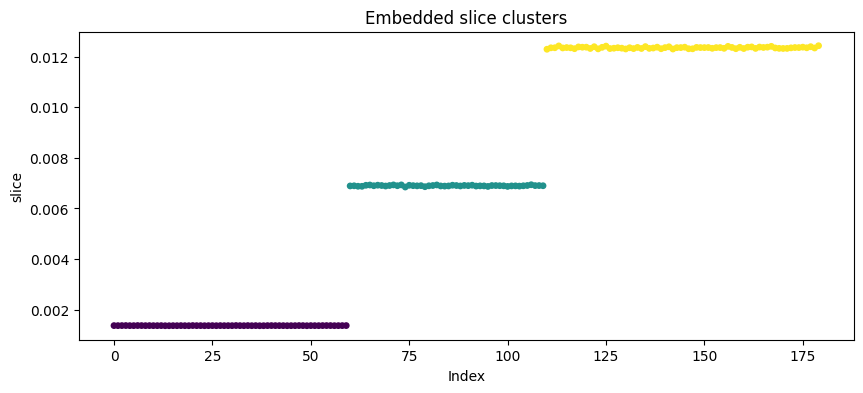

In [6]:

plt.figure(figsize=(10,4))
plt.scatter(range(len(ops_df)), ops_df['slice'], c=ops_df['cluster'], s=15)
plt.title('Embedded slice clusters')
plt.xlabel('Index'); plt.ylabel('slice')
plt.show()


In [7]:

ops_df.to_csv('clustered_results_embedded.csv', index=False)
print('Saved clustered_results_embedded.csv')


Saved clustered_results_embedded.csv
